In [1]:
import pandas as pd
import numpy
from sklearn import model_selection, preprocessing

In [2]:
df = pd.read_csv('Unemployment_mental_illness_survey.csv')
# df.head()

In [3]:
# Original column names are cumbersome. Change to convenient ones.

clean_df=df.rename(columns={"I am currently employed at least part-time":"employed",
                   "I identify as having a mental illness":"mental_illness",
                   "I have my own computer separate from a smart phone":"own_computer",
                   "I have been hospitalized before for my mental illness":"hospitalized",
                   "How many days were you hospitalized for your mental illness":"hospitalized_days",
                   "I am legally disabled":"disabled","I have my regular access to the internet":"internet",
                   "I live with my parents":"with_parents","I have a gap in my resume":"gap",
                   "Total length of any gaps in my resume in\xa0months.":"months_gap",
                   "Annual income (including any social welfare programs) in USD":"income_with_social",
                   "I am unemployed":"unemployed",
                   "I read outside of work and school":"read",
                   "Annual income from social welfare programs":"welfare_income",
                   "I receive food stamps":"food_stamp",
                   "I am on section 8 housing":"section_8",
                   "How many times were you hospitalized for your mental illness":"times_hospitalized",
                   "Lack of concentration":"Lack_concentration",
                   "Obsessive thinking":"Obsessive_thinking",
                   "Mood swings":"Mood_swings",
                   "Panic attacks":"Panic_attacks",
                   "Compulsive behavior":"Compulsive_behavior",
                   "Household Income":"Household_Income",
                   "Device Type":"Device"
                  })
clean_df.head()

,employed,mental_illness,Education,own_computer,hospitalized,hospitalized_days,disabled,internet,with_parents,gap,...,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household_Income,Region,Device
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
# Eliminate uninformative data

del clean_df['unemployed']
del clean_df['Device']
del clean_df['income_with_social']
clean_df = clean_df[clean_df.Household_Income != 'Prefer not to answer']
# clean_df.head()

In [5]:
# Check correlation of columns
clean_df.corr()

,employed,mental_illness,own_computer,hospitalized,hospitalized_days,disabled,internet,with_parents,gap,months_gap,...,section_8,times_hospitalized,Lack_concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
employed,1.000000,-0.104621,0.158503,-0.168994,-0.126957,-0.337514,0.160950,-0.148302,-0.172162,-0.279908,...,-0.113385,-0.050169,-0.080132,-0.169795,-0.132393,-0.132624,-0.157823,-0.210314,-0.070536,-0.035662
mental_illness,-0.104621,1.000000,-0.163461,0.437578,0.276259,0.247439,-0.106026,0.147381,0.232097,0.195734,...,0.026442,0.125989,0.372071,0.560525,0.715468,0.420565,0.429284,0.450457,0.385814,0.290748
own_computer,0.158503,-0.163461,1.000000,-0.147175,-0.189586,-0.136747,0.216470,-0.136747,-0.187225,-0.185854,...,-0.019823,-0.020067,-0.056219,-0.225912,-0.139201,-0.160235,-0.209030,-0.101056,-0.097152,-0.020066
hospitalized,-0.168994,0.437578,-0.147175,1.000000,0.512526,0.324636,-0.077694,0.089883,0.214118,0.176974,...,0.128734,0.360593,0.158533,0.248226,0.327783,0.384322,0.258405,0.344839,0.283311,0.165713
hospitalized_days,-0.126957,0.276259,-0.189586,0.512526,1.000000,0.270963,-0.055250,0.186475,0.152396,0.107064,...,0.067639,0.712215,-0.024841,0.166436,0.203351,0.251117,0.167501,0.315591,0.215140,0.012615
disabled,-0.337514,0.247439,-0.136747,0.324636,0.270963,1.000000,0.004883,0.159091,0.147381,0.200237,...,0.104330,0.072073,0.173777,0.124650,0.246394,0.192603,0.176179,0.162058,0.159576,0.082266
internet,0.160950,-0.106026,0.216470,-0.077694,-0.055250,0.004883,1.000000,-0.055336,-0.063035,-0.109821,...,0.026896,-0.041020,-0.017061,-0.079651,-0.009599,-0.037493,-0.159071,0.027374,-0.005505,0.043994
with_parents,-0.148302,0.147381,-0.136747,0.089883,0.186475,0.159091,-0.055336,1.000000,0.197410,0.049398,...,-0.050078,0.127760,0.107922,0.171953,0.173462,0.153493,0.236274,0.124867,0.191703,-0.020561
gap,-0.172162,0.232097,-0.187225,0.214118,0.152396,0.147381,-0.063035,0.197410,1.000000,0.645932,...,0.026442,0.062739,0.178687,0.189047,0.229499,0.277757,0.162858,0.293590,0.273640,0.098848
months_gap,-0.279908,0.195734,-0.185854,0.176974,0.107064,0.200237,-0.109821,0.049398,0.645932,1.000000,...,0.160956,0.027568,0.165680,0.202606,0.150244,0.155004,0.137472,0.233601,0.283740,0.093844


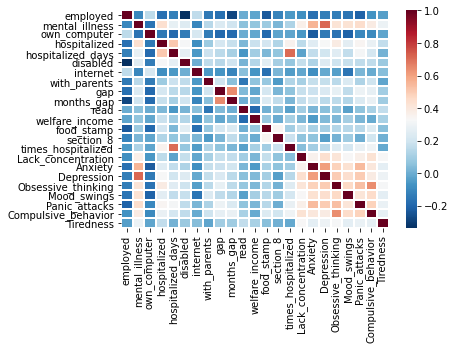

In [6]:
# Map predictiveness of columns
pearsoncorr=clean_df.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='RdBu_r',
           annot=False, linewidth=1)

In [7]:
# Based on the heatmap, the columns relating to mental health symptoms predict each other,
# and everything negatively predicts employment,
# but there seems little overall predictiveness.
trimmed_df = clean_df[["employed", "mental_illness", "hospitalized", "hospitalized_days", "disabled", "with_parents",
              "gap", "months_gap", "read", "welfare_income", "food_stamp", "section_8", "times_hospitalized",
              "Lack_concentration", "Anxiety", "Depression", "Obsessive_thinking", "Mood_swings", "Panic_attacks",
              "Compulsive_behavior", "Household_Income"]]

In [8]:
# Change strings to categories

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# clean_df = pd.get_dummies(clean_df, columns=['Education', 'Age', 'Gender', 'Region'])
trimmed_df = trimmed_df.fillna(0)
trimmed_df.head()

Using TensorFlow backend.


,employed,mental_illness,hospitalized,hospitalized_days,disabled,with_parents,gap,months_gap,read,welfare_income,...,section_8,times_hospitalized,Lack_concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Household_Income
0,0,0,0,0.0,0,0,1,24,1,0,...,0,0,1.0,1,1,1.0,0.0,1.0,0.0,"$25,000-$49,999"
1,1,1,0,0.0,0,0,0,1,1,0,...,0,0,1.0,1,1,0.0,0.0,1.0,0.0,"$50,000-$74,999"
2,1,0,0,0.0,0,0,0,0,1,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,"$150,000-$174,999"
3,0,0,0,0.0,0,1,1,11,1,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,"$25,000-$49,999"
4,1,1,1,35.0,1,0,1,33,1,30,...,0,4,1.0,1,1,1.0,1.0,1.0,1.0,"$25,000-$49,999"


In [9]:
# Set household income as the prediction compared to other factors

X = trimmed_df.drop(columns="Household_Income")
y = trimmed_df["Household_Income"].values.reshape(-1, 1)
print(X.shape, y.shape)

(296, 20) (296, 1)


In [10]:
# Split training and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 18)

In [11]:
# This is a classification problem, so let us try a random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [12]:
# Change string columns to one-hot categories

labelencoder = LabelEncoder()
labelencoder.fit(y_train)
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

C:\Users\jason\Anaconda3\envs\JasonsWorld\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jason\Anaconda3\envs\JasonsWorld\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(x_train, y_train_categorical)

training_score = model.score(x_train, y_train_categorical)
testing_score = model.score(x_test, y_test_categorical)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

# When using all columns, train was extremely overfitted, 0.99 compared to test <0.1
# Using only the most predictive columns eliminated the overfitting but did not improve the test.

Training Score: 0.5855855855855856
Testing Score: 0.06756756756756757


In [14]:
# Let us also try deep learning
# Next six cells, code provided by tutor

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [15]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(x_train)
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)

In [16]:
model2 = Sequential()
model2.add(Dense(units=100, activation='relu', input_dim=20))
model2.add(Dense(units=100, activation='relu'))
model2.add(Dense(units=100, activation='selu'))
model2.add(Dense(units=10, activation='softmax'))

# Tried each activation in layer 3: relu, selu, elu, sigmoid, softplus, softsign, tanh
# This was the most accurate

In [17]:
# Compile and fit the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model2.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 0s - loss: 2.2194 - accuracy: 0.1847
Epoch 2/50
 - 0s - loss: 2.0670 - accuracy: 0.2477
Epoch 3/50
 - 0s - loss: 2.0058 - accuracy: 0.2838
Epoch 4/50
 - 0s - loss: 1.9593 - accuracy: 0.2793
Epoch 5/50
 - 0s - loss: 1.9202 - accuracy: 0.3063
Epoch 6/50
 - 0s - loss: 1.8834 - accuracy: 0.3198
Epoch 7/50
 - 0s - loss: 1.8468 - accuracy: 0.3739
Epoch 8/50
 - 0s - loss: 1.8081 - accuracy: 0.3694
Epoch 9/50
 - 0s - loss: 1.7804 - accuracy: 0.3604


C:\Users\jason\Anaconda3\envs\JasonsWorld\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 10/50
 - 0s - loss: 1.7445 - accuracy: 0.3739
Epoch 11/50
 - 0s - loss: 1.7067 - accuracy: 0.3919
Epoch 12/50
 - 0s - loss: 1.6892 - accuracy: 0.3874
Epoch 13/50
 - 0s - loss: 1.6497 - accuracy: 0.4009
Epoch 14/50
 - 0s - loss: 1.6176 - accuracy: 0.4054
Epoch 15/50
 - 0s - loss: 1.5926 - accuracy: 0.4279
Epoch 16/50
 - 0s - loss: 1.5733 - accuracy: 0.4189
Epoch 17/50
 - 0s - loss: 1.5402 - accuracy: 0.4144
Epoch 18/50
 - 0s - loss: 1.5139 - accuracy: 0.4550
Epoch 19/50
 - 0s - loss: 1.4777 - accuracy: 0.4459
Epoch 20/50
 - 0s - loss: 1.4511 - accuracy: 0.4865
Epoch 21/50
 - 0s - loss: 1.4257 - accuracy: 0.5000
Epoch 22/50
 - 0s - loss: 1.3979 - accuracy: 0.4955
Epoch 23/50
 - 0s - loss: 1.3887 - accuracy: 0.5135
Epoch 24/50
 - 0s - loss: 1.3536 - accuracy: 0.5405
Epoch 25/50
 - 0s - loss: 1.3405 - accuracy: 0.5180
Epoch 26/50
 - 0s - loss: 1.3092 - accuracy: 0.5495
Epoch 27/50
 - 0s - loss: 1.2960 - accuracy: 0.5360
Epoch 28/50
 - 0s - loss: 1.2712 - accuracy: 0.5766
Epoch 29/50


In [19]:
# Unfortunately, no model tests above the mid teens.

model_loss, model_accuracy = model2.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 3.243387795783378, Accuracy: 0.14864864945411682


In [20]:
# Would the Multi-layer Perceptron do better?
# Code in this cell from https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, activation = 'relu',
                           solver='adam', random_state=1)
classifier.fit(X_train_scaled, y_train_categorical)
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_pred.argmax(axis=1), y_test_categorical.argmax(axis=1)) # .argmax from StackOverflow

#Printing the accuracy
print(f"Accuracy of MLPClassifier: {cm}")

Accuracy of MLPClassifier: [[ 5  4  4  3  3  1  7 10 11  2]
 [ 0  1  0  0  0  0  0  3  1  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 1  1  1  2  0  0  0  1  2  1]
 [ 0  1  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  1  0  0  1  1  1]]


In [21]:
# The confusion matrix reveals very low accuracy.
# Let us try different subset of columns.
econ_df = clean_df[["employed", "Education", "mental_illness", "disabled", "with_parents", "gap", "months_gap", "read", 
                    "welfare_income", "food_stamp", "section_8", "Anxiety", "Depression", "Household_Income", "Region"]]
econ_df = econ_df[econ_df.Household_Income != 'Prefer not to answer']
econ_df = pd.get_dummies(econ_df, columns=['Education', 'Region'])
econ_df = econ_df.fillna(0)
econ_df.head()

,employed,mental_illness,disabled,with_parents,gap,months_gap,read,welfare_income,food_stamp,section_8,...,Education_Some Masters,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central
0,0,0,0,0,1,24,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,11,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,0,1,33,1,30,0,0,...,0,1,0,0,0,0,0,0,0,0


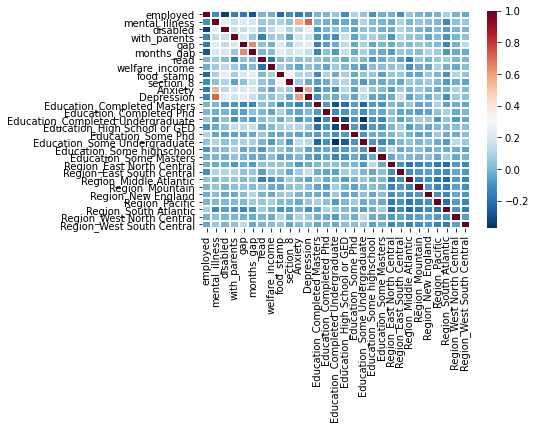

In [22]:
pearsoncorr2=econ_df.corr(method='pearson')
sb.heatmap(pearsoncorr2, xticklabels=pearsoncorr2.columns, yticklabels=pearsoncorr2.columns, cmap='RdBu_r',
           annot=False, linewidth=1)

In [23]:
# As expected, mental illness, anxiety, and depression positively predict each other.
# Perhaps unexpectedly, it appears that education and region are not very predictive, other than mutually exclusive.

In [24]:
# Set household income as the prediction compared to other factors

X = econ_df.drop(columns="Household_Income")
y = econ_df["Household_Income"].values.reshape(-1, 1)
print(X.shape, y.shape)

(296, 29) (296, 1)


In [36]:
# Split training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 18)

# Build model, similar to previous. Add more layers.
model3 = Sequential()
model3.add(Dense(units=100, activation='relu', input_dim=20))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=100, activation='selu'))
model3.add(Dense(units=10, activation='softmax'))

In [37]:
# Compile and fit the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model3.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 0s - loss: 2.2290 - accuracy: 0.1622
Epoch 2/50
 - 0s - loss: 2.0789 - accuracy: 0.2342
Epoch 3/50
 - 0s - loss: 2.0125 - accuracy: 0.2477
Epoch 4/50
 - 0s - loss: 1.9629 - accuracy: 0.3063
Epoch 5/50
 - 0s - loss: 1.9144 - accuracy: 0.2973
Epoch 6/50
 - 0s - loss: 1.8588 - accuracy: 0.3063
Epoch 7/50
 - 0s - loss: 1.8086 - accuracy: 0.3378
Epoch 8/50
 - 0s - loss: 1.7507 - accuracy: 0.3919
Epoch 9/50
 - 0s - loss: 1.6938 - accuracy: 0.3964


C:\Users\jason\Anaconda3\envs\JasonsWorld\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 10/50
 - 0s - loss: 1.6490 - accuracy: 0.4189
Epoch 11/50
 - 0s - loss: 1.6098 - accuracy: 0.3964
Epoch 12/50
 - 0s - loss: 1.5405 - accuracy: 0.4595
Epoch 13/50
 - 0s - loss: 1.4991 - accuracy: 0.4595
Epoch 14/50
 - 0s - loss: 1.4390 - accuracy: 0.4910
Epoch 15/50
 - 0s - loss: 1.4232 - accuracy: 0.4955
Epoch 16/50
 - 0s - loss: 1.3684 - accuracy: 0.5135
Epoch 17/50
 - 0s - loss: 1.3202 - accuracy: 0.5405
Epoch 18/50
 - 0s - loss: 1.3034 - accuracy: 0.5405
Epoch 19/50
 - 0s - loss: 1.2577 - accuracy: 0.5586
Epoch 20/50
 - 0s - loss: 1.2552 - accuracy: 0.5405
Epoch 21/50
 - 0s - loss: 1.1979 - accuracy: 0.5586
Epoch 22/50
 - 0s - loss: 1.1864 - accuracy: 0.5721
Epoch 23/50
 - 0s - loss: 1.1630 - accuracy: 0.5315
Epoch 24/50
 - 0s - loss: 1.1286 - accuracy: 0.5631
Epoch 25/50
 - 0s - loss: 1.1120 - accuracy: 0.5766
Epoch 26/50
 - 0s - loss: 1.1152 - accuracy: 0.5721
Epoch 27/50
 - 0s - loss: 1.0587 - accuracy: 0.5901
Epoch 28/50
 - 0s - loss: 1.0752 - accuracy: 0.5766
Epoch 29/50


In [38]:
# Unfortunately, this combination of columns does no better, even with more layers.

model_loss, model_accuracy = model2.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 3.243387795783378, Accuracy: 0.14864864945411682


In [28]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, activation = 'relu',
                           solver='adam', random_state=1)
classifier.fit(X_train_scaled, y_train_categorical)
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_pred.argmax(axis=1), y_test_categorical.argmax(axis=1)) # .argmax from StackOverflow

#Printing the accuracy
print(f"Accuracy of MLPClassifier: {cm}")

# This confusion matrix is nearly indistinguishable from the other.

Accuracy of MLPClassifier: [[ 5  4  4  3  3  1  7 10 11  2]
 [ 0  1  0  0  0  0  0  3  1  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 1  1  1  2  0  0  0  1  2  1]
 [ 0  1  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  1  0  0  1  1  1]]


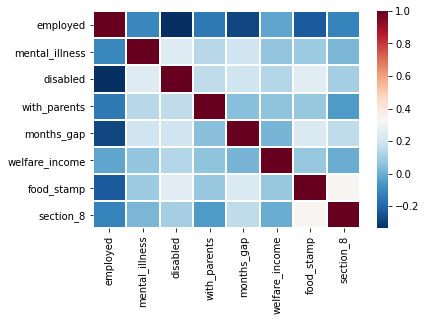

In [39]:
# Since education and region were not predictive, try it with just the direct economic factors
econ_df_2 = clean_df[["employed", "mental_illness", "disabled", "with_parents", "months_gap", 
                    "welfare_income", "food_stamp", "section_8", "Household_Income"]]
pearsoncorr3=econ_df_2.corr(method='pearson')
sb.heatmap(pearsoncorr3, xticklabels=pearsoncorr3.columns, yticklabels=pearsoncorr3.columns, cmap='RdBu_r',
           annot=False, linewidth=1)

In [ ]:
# Do not believe it is worth continuing:
# Nothing is predictive except the obvious, that everything else negatively predicts employment.